In [1]:
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
path = 'C:/Users/yixin/Desktop/Machine_Learning_Projects/recruit-restaurant-visitor-forecasting/'

data = {
    'air_reserve': pd.read_csv(path + 'input/air_reserve.csv', \
                               parse_dates=['visit_datetime', 'reserve_datetime']),
    'hpg_reserve': pd.read_csv(path + 'input/hpg_reserve.csv', \
                               parse_dates=['visit_datetime', 'reserve_datetime']),
    'air_visit': pd.read_csv(path + 'input/air_visit_data.csv', parse_dates=['visit_date']),
    'holidays': pd.read_csv(path + 'input/date_info.csv', parse_dates=['calendar_date']).rename(
        columns={'calendar_date': 'visit_date'}),
    'air_store': pd.read_csv(path + 'input/air_store_info.csv'),
    'hpg_store': pd.read_csv(path + 'input/hpg_store_info.csv'),
    'store_id': pd.read_csv(path + 'input/store_id_relation.csv'),
    'submission': pd.read_csv(path + 'input/sample_submission.csv'),
}

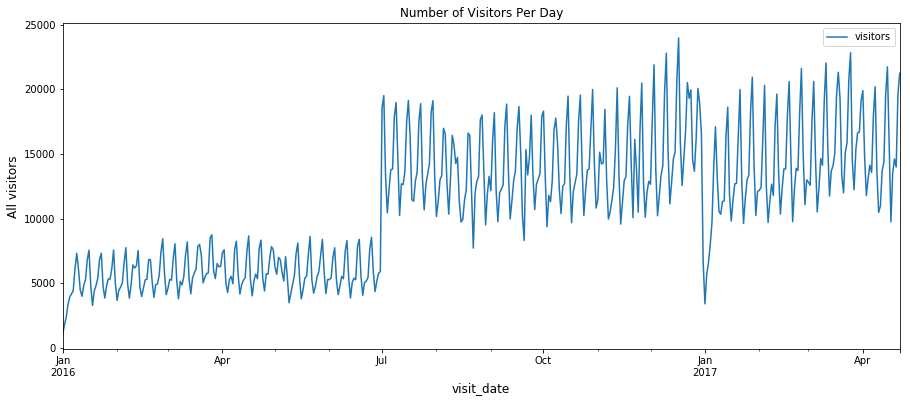

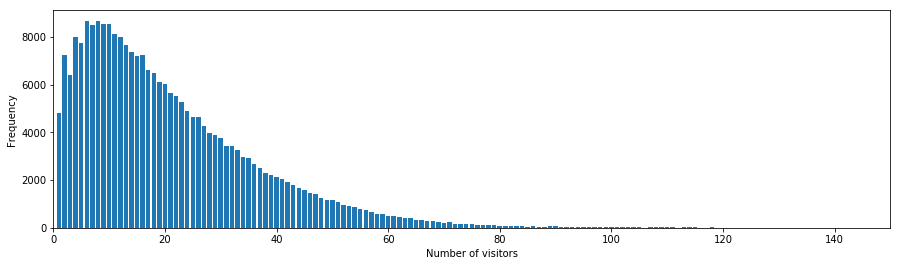

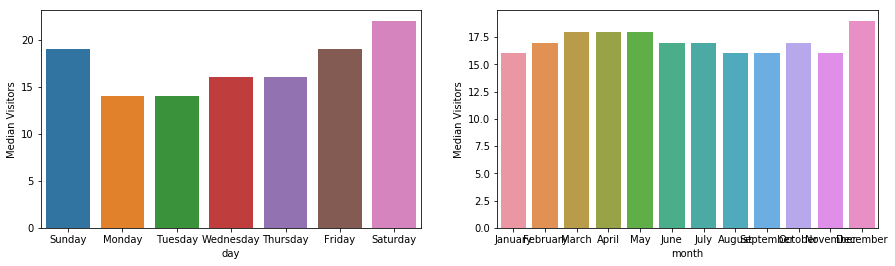

In [3]:
"""
EDA for air_visit_data.
Features: air_store_id, visit_date, number of visitors (month and day will be added).
"""
# Time-series visualization: number of visitors vs. visit_date
plt1 = data['air_visit'].groupby(['visit_date'], as_index=False)['visitors'].sum()
plt1 = plt1.set_index('visit_date')
plt1.plot(figsize=(15, 6))
plt.xlabel('visit_date', fontsize=12)
plt.ylabel('All visitors', fontsize=12)
plt.title('Number of Visitors Per Day')

# Plot frequency vs. number of visitors
plt2 = data['air_visit']['visitors'].value_counts().reset_index()
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
ax.bar(plt2['index'], plt2['visitors'])
ax.set_xlabel('Number of visitors')
ax.set_ylabel('Frequency')
ax.set_xlim(0, 150)

# Visualize median number of visitors in day of a week
data['air_visit']['day'] = data['air_visit']['visit_date'].apply(lambda x:calendar.day_name[x.weekday()])
plt3 = data['air_visit'].groupby(['day'], as_index=False)['visitors'].median()
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
day2number = {day: i for i, day in enumerate(days)}
key = plt3['day'].map(day2number)
plt3 = plt3.iloc[key.argsort()]

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 4)
sns.barplot(x='day', y='visitors', data=plt3, ax=ax[0])
ax[0].set_ylabel('Median Visitors')

# Visualize median number of visitors in month of a year
data['air_visit']['month'] = data['air_visit']['visit_date'].apply(lambda x:calendar.month_name[x.month])
plt4 = data['air_visit'].groupby(['month'], as_index=False)['visitors'].median()
months = ['January','February','March','April','May','June','July',
          'August','September','October','November','December']
month2number = {month: i for i, month in enumerate(months)}
key = plt4['month'].map(month2number)
plt4 = plt4.iloc[key.argsort()]

sns.barplot(x='month', y='visitors', data=plt4, ax=ax[1])
ax[1].set_ylabel('Median Visitors')

plt.show()

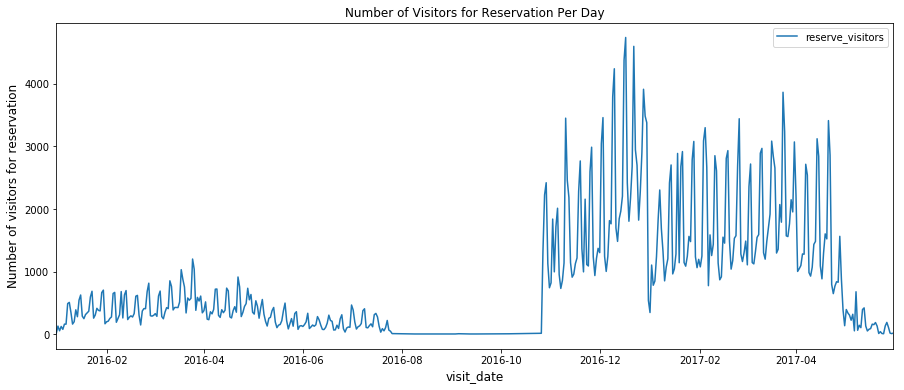

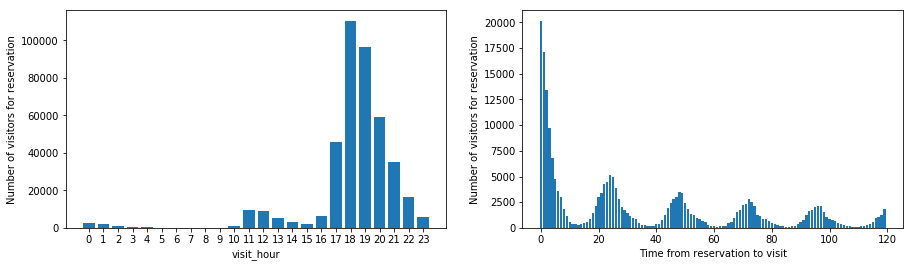

In [4]:
"""
EDA for air_reserve.
Features: air_store_id, visit_datetime, reserve_datetime, number of visitors for reservation
visit_date, visit_hour, diff_hour will be added as new features.
"""
# Time-series visualization: number of visitors for reservation vs. visit_date.
# Can serve as a comparison with actual visitor numbers
data['air_reserve']['visit_date'] = data['air_reserve']['visit_datetime'].apply(lambda x:x.date())
plt5 = data['air_reserve'].groupby(['visit_date'], as_index=False)['reserve_visitors'].sum()
plt5 = plt5.set_index('visit_date')
plt5.plot(figsize=(15, 6))
plt.xlabel('visit_date', fontsize=12)
plt.ylabel('Number of visitors for reservation', fontsize=12)
plt.title('Number of Visitors for Reservation Per Day')

# Visualize number of visitors for reservation vs. visiting hour
data['air_reserve']['visit_hour'] = data['air_reserve']['visit_datetime'].apply(lambda x:x.time().hour)
plt6 = data['air_reserve'].groupby(['visit_hour'], as_index=False)['reserve_visitors'].sum()

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 4)
ax[0].bar(plt6['visit_hour'], plt6['reserve_visitors'])
ax[0].set_xlabel('visit_hour')
ax[0].set_ylabel('Number of visitors for reservation')
ax[0].set_xticks(plt6['visit_hour'])

# Visualize number of visitors for reservation vs. time from reservation to visit
data['air_reserve']['diff_hour'] = ( \
                            data['air_reserve']['visit_datetime'] - data['air_reserve']['reserve_datetime'] \
                                   ).apply(lambda x:x.total_seconds() / 3600)
plt7 = data['air_reserve'].groupby(['diff_hour'], as_index=False)['reserve_visitors'].sum()
plt7 = plt7.loc[plt7['diff_hour'] < 24 * 5]
ax[1].bar(plt7['diff_hour'], plt7['reserve_visitors'])
ax[1].set_xlabel('Time from reservation to visit')
ax[1].set_ylabel('Number of visitors for reservation')

plt.show()

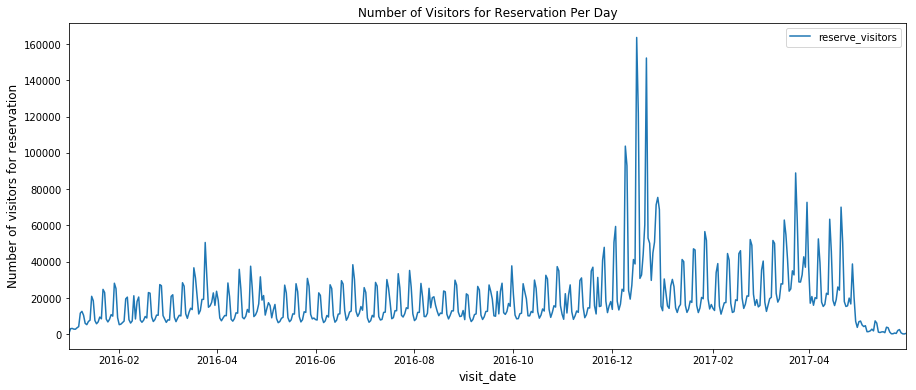

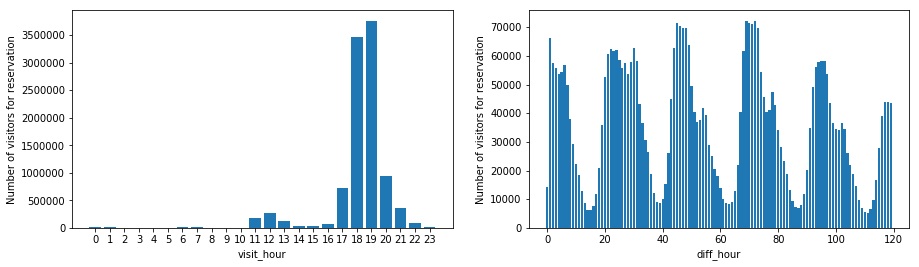

In [5]:
"""
EDA for hpg_reserve. This is similar to EDA for air_reserve
Features: air_store_id, visit_datetime, reserve_datetime, number of visitors for reservation
visit_date, visit_hour, diff_hour will be added as new features.
"""
# Time-series visualization: number of visitors for reservation vs. visit_date.
data['hpg_reserve']['visit_date'] = data['hpg_reserve']['visit_datetime'].apply(lambda x:x.date())
plt8 = data['hpg_reserve'].groupby(['visit_date'], as_index=False)['reserve_visitors'].sum()
plt8 = plt8.set_index('visit_date')
plt8.plot(figsize=(15, 6))
plt.xlabel('visit_date', fontsize=12)
plt.ylabel('Number of visitors for reservation', fontsize=12)
plt.title('Number of Visitors for Reservation Per Day')

# Visualize number of visitors for reservation vs. visiting hour
data['hpg_reserve']['visit_hour'] = data['hpg_reserve']['visit_datetime'].apply(lambda x:x.time().hour)
plt9 = data['hpg_reserve'].groupby(['visit_hour'], as_index=False)['reserve_visitors'].sum()

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 4)
ax[0].bar(plt9['visit_hour'], plt9['reserve_visitors'])
ax[0].set_xlabel('visit_hour')
ax[0].set_ylabel('Number of visitors for reservation')
ax[0].set_xticks(plt9['visit_hour'])

# Visualize number of visitors for reservation vs. time from reservation to visit
data['hpg_reserve']['diff_hour'] = ( \
                            data['hpg_reserve']['visit_datetime'] - data['hpg_reserve']['reserve_datetime'] \
                                   ).apply(lambda x:x.total_seconds() / 3600)
plt10 = data['hpg_reserve'].groupby(['diff_hour'], as_index=False)['reserve_visitors'].sum()
plt10 = plt10.loc[plt10['diff_hour'] < 24 * 5]
ax[1].bar(plt10['diff_hour'], plt10['reserve_visitors'])
ax[1].set_xlabel('diff_hour')
ax[1].set_ylabel('Number of visitors for reservation')

plt.show()

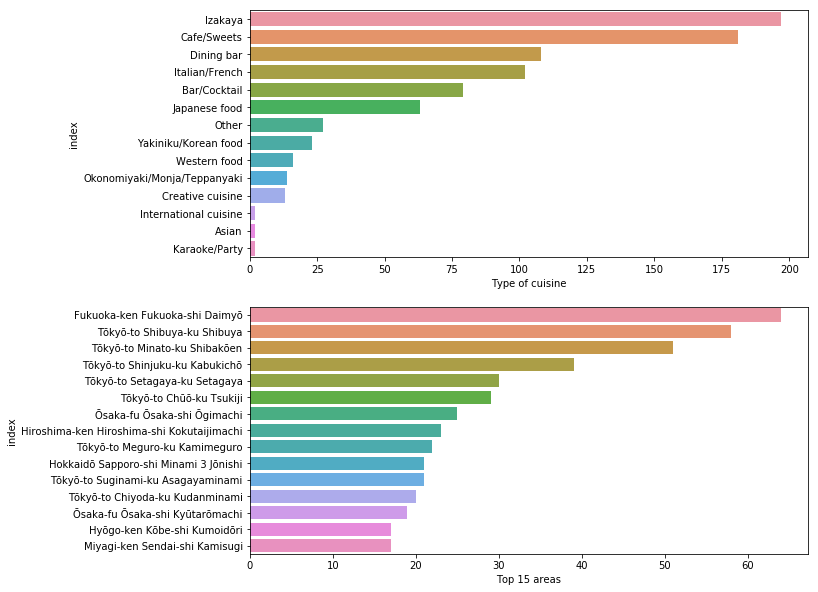

In [6]:
"""
EDA for air_store_info.
Featuers: air_store_id, air_genre_name, air_area_name, latitude, longitude
"""
plt11 = data['air_store']['air_genre_name'].value_counts().reset_index()
plt12 = data['air_store']['air_area_name'].value_counts().reset_index().iloc[:15]  # top 15 areas
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(10, 10)
sns.barplot(x='air_genre_name', y='index', data=plt11, ax=ax[0])
sns.barplot(x='air_area_name', y='index', data=plt12, ax=ax[1])
ax[0].set_xlabel('Number of Restaurants'); ax[0].set_xlabel('Type of cuisine')
ax[1].set_xlabel('Number of Restaurants'); ax[1].set_xlabel('Top 15 areas')

plt.show()

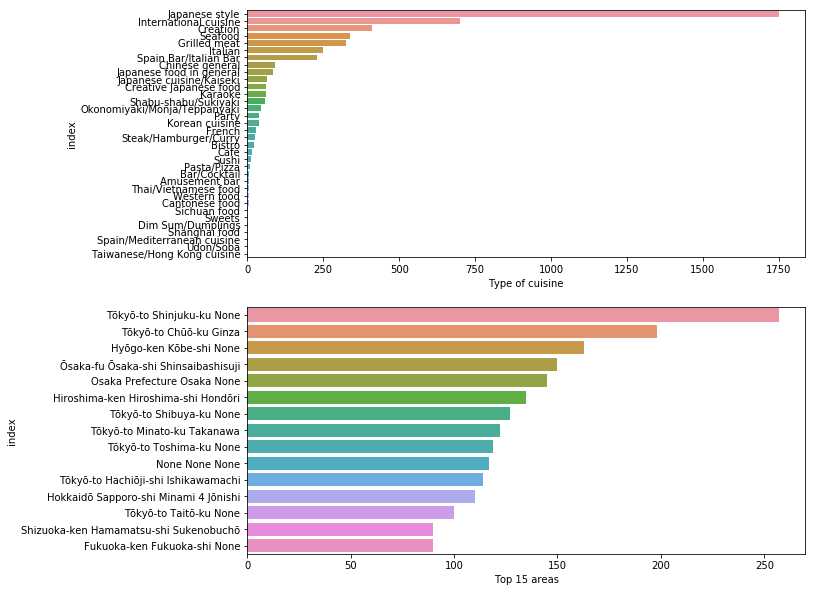

In [7]:
"""
EDA for hpg_store_info.
Featuers: hpg_store_id, hpg_genre_name, hpg_area_name, latitude, longitude
"""
plt13 = data['hpg_store']['hpg_genre_name'].value_counts().reset_index()
plt14 = data['hpg_store']['hpg_area_name'].value_counts().reset_index().iloc[:15]  # top 15 areas
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(10, 10)
sns.barplot(x='hpg_genre_name', y='index', data=plt13, ax=ax[0])
sns.barplot(x='hpg_area_name', y='index', data=plt14, ax=ax[1])
ax[0].set_xlabel('Number of Restaurants'); ax[0].set_xlabel('Type of cuisine')
ax[1].set_xlabel('Number of Restaurants'); ax[1].set_xlabel('Top 15 areas')

plt.show()

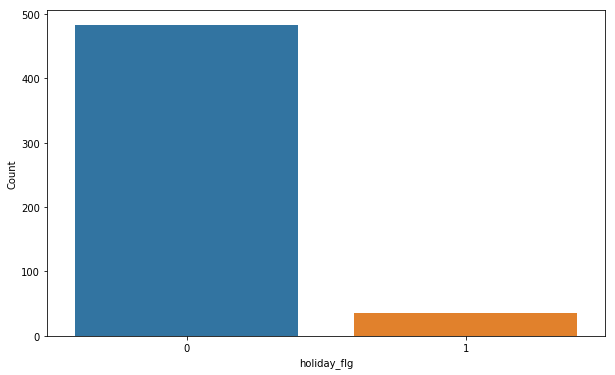

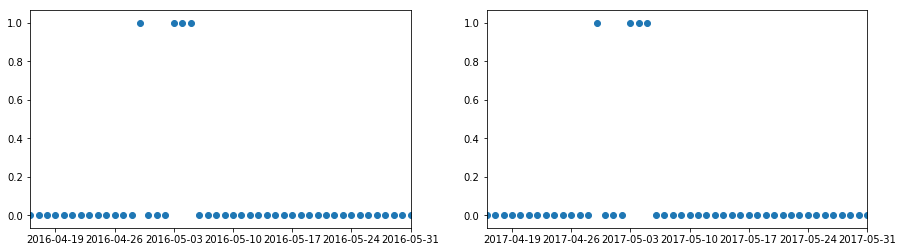

In [8]:
"""
EDA for holidays.
Featuers: visit_date, day_of_week, holiday_flg
"""
# Plot the counts of holidays and non-holidays
plt15 = data['holidays']['holiday_flg'].value_counts().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='holiday_flg', data=plt15)
plt.xlabel('holiday_flg'); plt.ylabel('Count')

# Plot holiday_flg vs. date
fig, ax = plt.subplots(1, 2); fig.set_size_inches(15, 4)
date = data['holidays'].set_index('visit_date').index
idx_2016 = (date > '2016-04-15') & (date < '2016-06-01')
idx_2017 = (date > '2017-04-15') & (date < '2017-06-01')
ax[0].scatter(date[idx_2016], data['holidays']['holiday_flg'].loc[idx_2016])
ax[1].scatter(date[idx_2017], data['holidays']['holiday_flg'].loc[idx_2017])
ax[0].set_xlim(date[idx_2016][0], date[idx_2016][-1])
ax[1].set_xlim(date[idx_2017][0], date[idx_2017][-1])

plt.show()